<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04



## Problema 01

<img src="https://drive.google.com/uc?export=view&id=1LkStfZqwS8AOm_xja6KDWWQMQV2ijrDu" width = "300" align="center"/>

EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(5,3)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_04/data/company_sales_data.csv")
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

[]

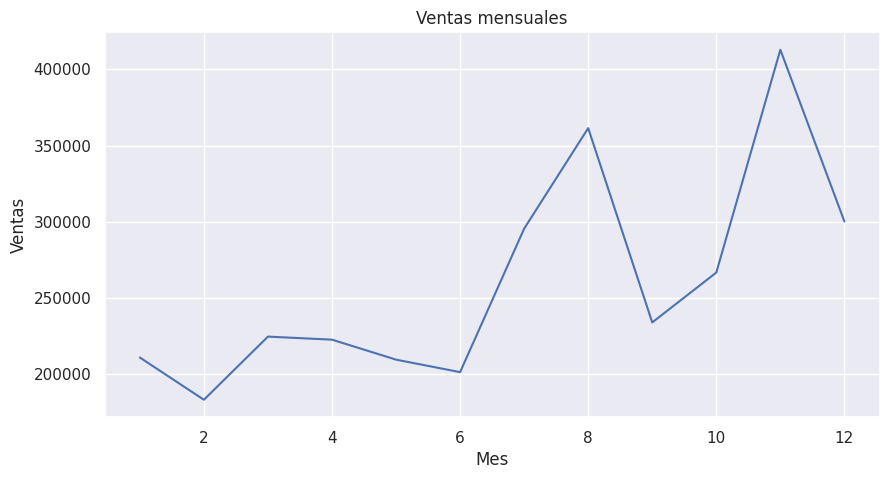

In [3]:
# Respuesta 1.

plt.figure(figsize=(10, 5))
sns.lineplot(
    x = 'month_number',
    y = 'total_profit',
    data = df
)
plt.title('Ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.plot()

**Respuesta:** Se observa que el mes de peor ventas es enero y el de mayor, noviembre. Tmabién, que en general, se realizan más ventas en segundo semestre.

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

In [4]:
# Respuesta 2.

# Preparar datos:
df2 = df.drop(columns = ['total_units', 'total_profit'])

df_melt = df2.melt(id_vars= ['month_number'], var_name = 'Productos', value_name = 'Ventas')

df_melt

,month_number,Productos,Ventas
0,1,facecream,2500
1,2,facecream,2630
2,3,facecream,2140
3,4,facecream,3400
4,5,facecream,3600
...,...,...,...
67,8,moisturizer,1400
68,9,moisturizer,1780
69,10,moisturizer,1890
70,11,moisturizer,2100


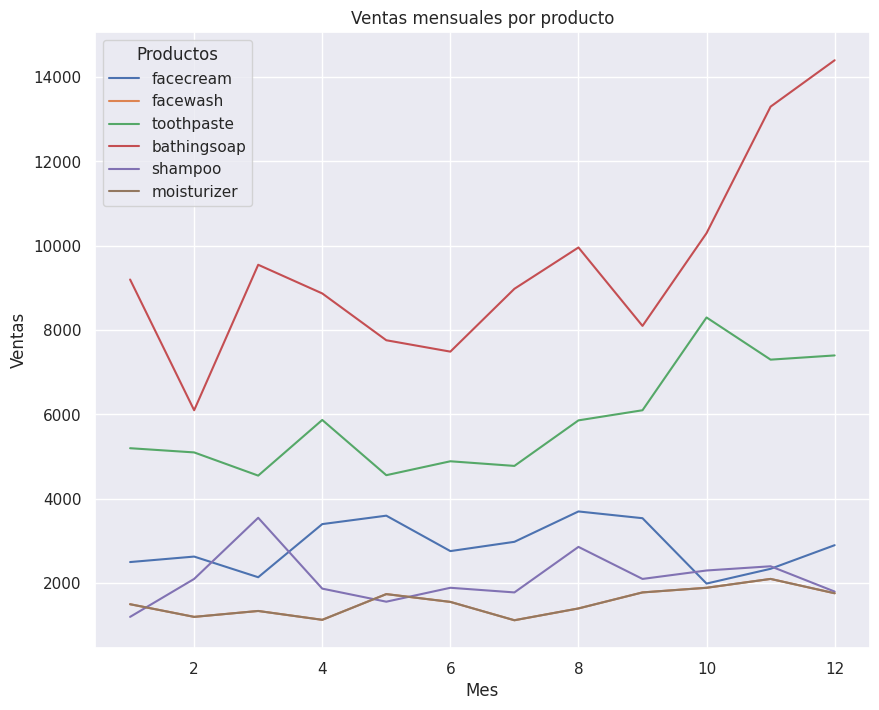

In [5]:
# Gráfico

plt.figure(figsize=(10, 8))
sns.lineplot(
    x = 'month_number',
    y = 'Ventas',
    hue = 'Productos',
    data = df_melt
)
plt.title('Ventas mensuales por producto')
plt.xlabel('Mes')
plt.show()

**Respuesta:** Se observa que el producto menos popular es 'moisturizer' y que el más popular es 'bathingsoap', superando al primero con un número de ventas de 5 veces o más.

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

In [7]:
# Respuesta 3.

# Preparar datos:
df_melt2 = df_melt.apply(lambda row : row[df_melt['Productos'].isin(['facecream', 'facewash'])])

df_melt2

,month_number,Productos,Ventas
0,1,facecream,2500
1,2,facecream,2630
2,3,facecream,2140
3,4,facecream,3400
4,5,facecream,3600
5,6,facecream,2760
6,7,facecream,2980
7,8,facecream,3700
8,9,facecream,3540
9,10,facecream,1990


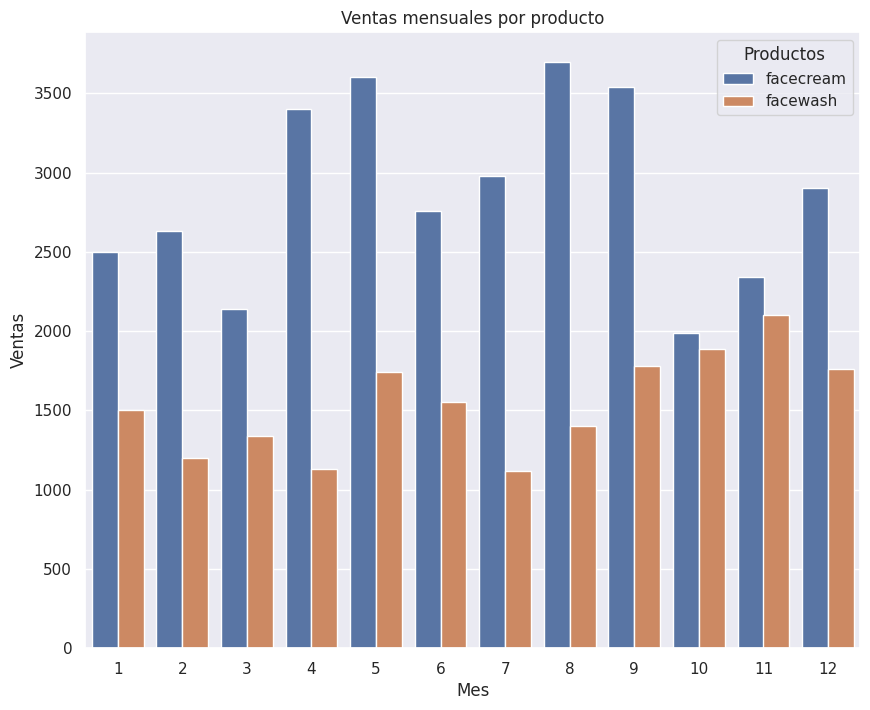

In [8]:
# Gráfico:

plt.figure(figsize=(10, 8))
sns.barplot(
    x = 'month_number',
    y = 'Ventas',
    hue = 'Productos',
    data = df_melt2
)
plt.title('Ventas mensuales por producto')
plt.xlabel('Mes')
plt.show()

**Respuesta:** Se observa que en la mayoría de los meses del año la venta de 'facecream' supera por el doble a la venta de 'facewash'. Sin embargo, en octubre y diciembre bajaron las ventas de 'facecream' y estas sobrepasan por poco a las ventas de 'facewash'.

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

In [9]:
# Respuestas 4.

# Preparar datos:

df3 = df.drop(columns = ['month_number', 'total_units', 'total_profit'])

df3

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,2500,1500,5200,9200,1200,1500
1,2630,1200,5100,6100,2100,1200
2,2140,1340,4550,9550,3550,1340
3,3400,1130,5870,8870,1870,1130
4,3600,1740,4560,7760,1560,1740
5,2760,1555,4890,7490,1890,1555
6,2980,1120,4780,8980,1780,1120
7,3700,1400,5860,9960,2860,1400
8,3540,1780,6100,8100,2100,1780
9,1990,1890,8300,10300,2300,1890


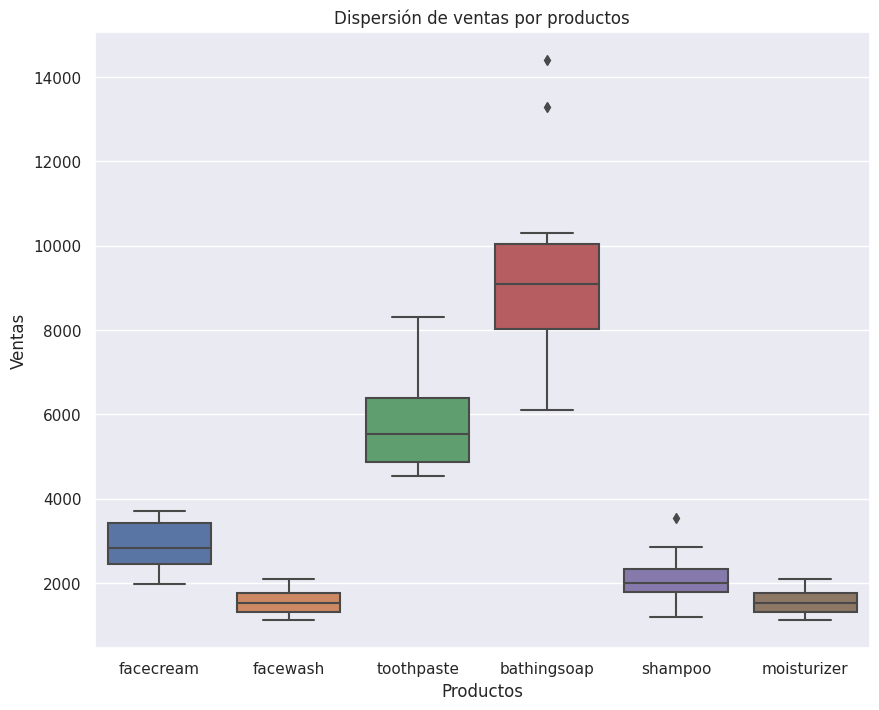

In [10]:
# Gráfico:

plt.figure(figsize=(10, 8))
sns.boxplot(df3)
plt.title('Dispersión de ventas por productos')
plt.xlabel('Productos')
plt.ylabel('Ventas')
plt.show()

**Respuesta:** Se observa que cada producto se diferencia por su dispersión respecto las ventas. También, que únicamente el 'bathingsoap' y el 'shampoo' poseen outlayers, es decir, meses donde el número de ventas de estos productos aumentaron considerablemente en relación a las ventas de los otros meses.

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico de barras

In [11]:
# Respuesta 5.

# Preparar datos:

df_venta_anual = df_melt.groupby('Productos')['Ventas'].sum().reset_index().sort_values('Ventas')

df_venta_anual

,Productos,Ventas
2,facewash,18515
3,moisturizer,18515
4,shampoo,25410
1,facecream,34480
5,toothpaste,69910
0,bathingsoap,114010


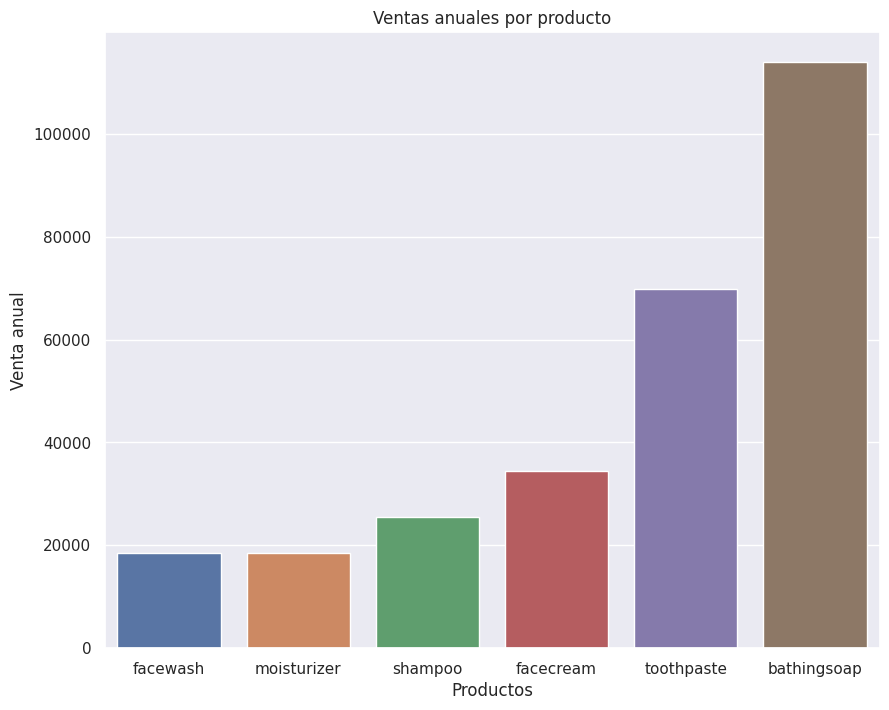

In [12]:
# Gráfico:

plt.figure(figsize=(10, 8))
sns.barplot(
    x = 'Productos',
    y = 'Ventas',
    data = df_venta_anual
)
plt.title('Ventas anuales por producto')
plt.ylabel('Venta anual')
plt.show()

**Respuesta:** Se observa que los productos 'facewash' y 'moisturizer' obtuvieron prácticamente la misma venta y con los números más bajos. Luego, le sigue el 'shampoo' y el 'facecream' que obtuvieron mejores ventas, pero sin diferenciarse tanto respecto los otros productos mencionados.

Por otro lado, el 'toothpaste' obtuve casi el doble de ventas y el 'bathingsoap', el cuadruple de ventas. Estos dos últimos productos se diferencian por su éxito de ventas.